# Introduction
## What is ROS1?

ROS1 is a gene that encodes a type of protein known as a receptor tyrosine kinase. Under normal circumstances, these proteins help regulate cell growth and division. However:

In ROS1+ lung cancer, part of the ROS1 gene gets fused with another gene (a fusion partner), due to a chromosomal translocation.

This fusion causes the ROS1 protein to be constantly active (even without external signals), leading to uncontrolled cell growth — a process called oncogenesis.

Common fusion partners for ROS1 include:

- CD74

- EZR

- SDC4

## What is the significance in lung cancer?
ROS1+ cases account for only 1–2% of all lung cancers, but identifying them is important because they respond well to targeted treatments.

These are often non-small cell lung cancers (NSCLC).

## How are ROS1+ cancers treated?
Patients are treated with Tyrosine Kinase Inhibitors (TKIs) such as:

- Crizotinib

- Entrectinib

These drugs block the activity of the abnormal ROS1 protein, slowing or stopping cancer growth.

## What’s the problem with TKIs?
Unfortunately, TKIs aren't a cure. Patients often develop resistance over time:

On-target resistance: Mutations directly in ROS1 that make the TKI less effective.

Off-target resistance: Other pathways in the cell take over to drive cancer growth (bypass mechanisms).

## What’s the goal of this project?
The project aims to unravel the mechanisms behind TKI resistance in ROS1+ lung cancer using patient-derived cell lines (PDCLs).

We’ll focus on:

- Transcriptomics: studying RNA expression to see which genes are turned on/off during TKI treatment.

Specifically, we'll look at changes in gene expression after treatment with crizotinib or entrectinib.

The goal is to:

- Understand which genes are up- or down-regulated upon TKI treatment.

- Identify potential new resistance mechanisms or biomarkers for treatment response.

# Preliminary Data Handling

In [1]:
# install.packages("BiocManager")
# BiocManager::install("GEOquery")
# BiocManager::install("DESeq2")


In [2]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#   install.packages("BiocManager")

# BiocManager::install("org.Hs.eg.db")  # Human gene annotation package
# BiocManager::install("EnhancedVolcano")


In [3]:
# install.packages("tinytex")

In [4]:
# allows you to interact with the NCBI GEO (Gene Expression Omnibus) database from within R
library(GEOquery)
# Load required libraries
library(data.table)

# tibble provides an enhanced version of data frames called tibbles.
# designed to make data analysis in R easier and more consistent.
library(tibble)

# data manipulation e.g. filtering, selecting, and summarizing data
library(dplyr)
# data reshaping e.g. joining, pivoting, and unpivoting data
library(tidyr)

# To add gene names
library(org.Hs.eg.db)

# To perform differential expression analysis
library(DESeq2)
# tidyverse is a collection of R packages designed for data science
library(tidyverse)

library(EnhancedVolcano)



Loading required package: Biobase

Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last

In [5]:
# GSE239844 is the GEO Series accession number peter et.al 2023
# GSE214715 chen et.al 2024
# gse is a list with only 1 element
gse239844 <- getGEO("GSE239844", GSEMatrix = TRUE)
gse214715 <- getGEO("GSE214715", GSEMatrix = TRUE)

Found 1 file(s)

GSE239844_series_matrix.txt.gz

Found 1 file(s)

GSE214715_series_matrix.txt.gz



In [6]:
# The information is in this index
gse239844 <- gse239844[[1]]
gse214715 <- gse214715[[1]]

In [7]:
gse239844 <- pData(gse239844)  # to get sample metadata
gse214715 <- pData(gse214715)

In [ ]:
# write.csv(gse239844, file = "gse239844_metadata.csv")
# write.csv(gse214715, file = "gse214715_metadata.csv")

In [9]:
dim(gse239844)
dim(gse214715)

[1] 42 48

[1] 20 46

In [10]:
head(gse239844)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,library_selection,library_source,library_strategy,relation,relation.1,supplementary_file_1,cell line:ch1,cell type:ch1,genotype:ch1,treatment:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM7675355,CUTO23_Ctl1,GSM7675355,Public on Aug 07 2023,Aug 01 2023,Aug 07 2023,SRA,1,CUTO23,Homo sapiens,cell line: CUTO23,⋯,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN36794715,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX21218278,NONE,CUTO23,Lung adenocarcinoma,CD74-ROS1,DMSO
GSM7675356,CUTO23_Ctl2,GSM7675356,Public on Aug 07 2023,Aug 01 2023,Aug 07 2023,SRA,1,CUTO23,Homo sapiens,cell line: CUTO23,⋯,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN36794714,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX21218279,NONE,CUTO23,Lung adenocarcinoma,CD74-ROS1,DMSO
GSM7675357,CUTO23_Ctl3,GSM7675357,Public on Aug 07 2023,Aug 01 2023,Aug 07 2023,SRA,1,CUTO23,Homo sapiens,cell line: CUTO23,⋯,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN36794713,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX21218280,NONE,CUTO23,Lung adenocarcinoma,CD74-ROS1,DMSO
GSM7675358,CUTO23_Criz1,GSM7675358,Public on Aug 07 2023,Aug 01 2023,Aug 07 2023,SRA,1,CUTO23,Homo sapiens,cell line: CUTO23,⋯,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN36794712,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX21218281,NONE,CUTO23,Lung adenocarcinoma,CD74-ROS1,250 nM crizotinib
GSM7675359,CUTO23_Criz2,GSM7675359,Public on Aug 07 2023,Aug 01 2023,Aug 07 2023,SRA,1,CUTO23,Homo sapiens,cell line: CUTO23,⋯,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN36794711,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX21218282,NONE,CUTO23,Lung adenocarcinoma,CD74-ROS1,250 nM crizotinib
GSM7675360,CUTO23_Criz3,GSM7675360,Public on Aug 07 2023,Aug 01 2023,Aug 07 2023,SRA,1,CUTO23,Homo sapiens,cell line: CUTO23,⋯,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN36794710,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX21218283,NONE,CUTO23,Lung adenocarcinoma,CD74-ROS1,250 nM crizotinib


In [11]:
head(gse214715)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,library_source,library_strategy,relation,relation.1,supplementary_file_1,cell line:ch1,cell type:ch1,genotype:ch1,tissue:ch1,treatment:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM6614824,CUTO28_SAMPLE1,GSM6614824,Public on Oct 06 2022,Oct 03 2022,Oct 06 2022,SRA,1,adenocarcinoma,Homo sapiens,tissue: adenocarcinoma,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN31140397,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX17783610,NONE,CUTO28 (TPM3-ROS1),NSCLC,TPM3-ROS1,adenocarcinoma,none
GSM6614825,CUTO28_SAMPLE2,GSM6614825,Public on Oct 06 2022,Oct 03 2022,Oct 06 2022,SRA,1,adenocarcinoma,Homo sapiens,tissue: adenocarcinoma,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN31140396,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX17783611,NONE,CUTO28 (TPM3-ROS1),NSCLC,TPM3-ROS1,adenocarcinoma,none
GSM6614826,CUTO28_SAMPLE3,GSM6614826,Public on Oct 06 2022,Oct 03 2022,Oct 06 2022,SRA,1,adenocarcinoma,Homo sapiens,tissue: adenocarcinoma,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN31140395,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX17783612,NONE,CUTO28 (TPM3-ROS1),NSCLC,TPM3-ROS1,adenocarcinoma,none
GSM6614827,CUTO28-CR_SAMPLE1,GSM6614827,Public on Oct 06 2022,Oct 03 2022,Oct 06 2022,SRA,1,adenocarcinoma,Homo sapiens,tissue: adenocarcinoma,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN31140394,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX17783613,NONE,CUTO28 (TPM3-ROS1),NSCLC,TPM3-ROS1,adenocarcinoma,500nM crizotinib
GSM6614828,CUTO28-CR_SAMPLE2,GSM6614828,Public on Oct 06 2022,Oct 03 2022,Oct 06 2022,SRA,1,adenocarcinoma,Homo sapiens,tissue: adenocarcinoma,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN31140393,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX17783614,NONE,CUTO28 (TPM3-ROS1),NSCLC,TPM3-ROS1,adenocarcinoma,500nM crizotinib
GSM6614829,CUTO28-CR_SAMPLE3,GSM6614829,Public on Oct 06 2022,Oct 03 2022,Oct 06 2022,SRA,1,adenocarcinoma,Homo sapiens,tissue: adenocarcinoma,⋯,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN31140392,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX17783615,NONE,CUTO28 (TPM3-ROS1),NSCLC,TPM3-ROS1,adenocarcinoma,500nM crizotinib


## GSE214715 Data Structure

| Cell line | Fusion partner | Treatment              | N | Treatment   | Meaning                 |
|-----------|----------------|------------------------|---|-------------|--------------------------|
| Cuto-28   | TPM3           | ctrl                   | 3 | CUTO28      | Parental (TKI-sensitive) |
| Cuto-28   | TPM3           | 500 nM crizotinib      | 3 | CUTO28-CR   | Crizotinib-resistant     |
| Cuto-28   | TPM3           | 500 nM entrectinib     | 2 | CUTO28-ER   | Entrectinib-resistant    |
| Cuto-37   | CD74           | ctrl                   | 3 | CUTO37      | Parental                 |
| Cuto-37   | CD74           | 500 nM crizotinib      | 3 | CUTO37-CR   | Crizotinib-resistant     |
| Cuto-37   | CD74           | 500 nM entrectinib     | 3 | CUTO37-ER   | Entrectinib-resistant    |

2 samples(Cuto-28, Cuto-37), 2 fusion partners(TPM3, CD74), 2 treatments (500 nM crizotinib, 500 nM entrectinib)  
For `Cuto-28` one sample was found to be an outlier and thus duplicates were analyzed.


## GSE239844 Data Structure
| Cell line | Fusion partner | Treatment           | N |
|-----------|----------------|---------------------|---|
| Cuto-23   | CD74           | Ctrl (DMSO)         | 3 |
| Cuto-23   | CD74           | 250nM crizotinib    | 3 |
| Cuto-27   | CD74           | Ctrl (DMSO)         | 3 |
| Cuto-27   | CD74           | 250nM crizotinib    | 3 |
| Cuto-28   | TPM3           | Ctrl (DMSO)         | 3 |
| Cuto-28   | TPM3           | 250nM crizotinib    | 3 |
| Cuto-33   | CD74           | Ctrl (DMSO)         | 3 |
| Cuto-33   | CD74           | 250nM crizotinib    | 3 |
| Cuto-37   | CD74           | Ctrl (DMSO)         | 3 |
| Cuto-37   | CD74           | 250nM crizotinib    | 3 |
| Cuto-38   | CD74           | Ctrl (DMSO)         | 3 |
| Cuto-38   | CD74           | 250nM crizotinib    | 3 |
| HCC78     | SLC34A2        | Ctrl (DMSO)         | 3 |
| HCC78     | SLC34A2        | 250nM crizotinib    | 3 |

7 samples (Cuto-23, Cuto-27, Cuto-28, Cuto-33, Cuto-37, Cuto-38, HCC78), 3 fusion partners(TPM3, CD74, SLC34A2 ), 1 treatment(250nM crizotinib)

In [12]:
# This is the gene expression matrix that brings together all of these samples.
# Read the count matrix
raw_counts_gse239844 <- fread("GSE239844_raw_counts.tsv") %>% as_tibble()
raw_counts_gse214715 <- fread("GSE214715_raw_counts.tsv") %>% as_tibble()

In [13]:
# Peek at the data
head(raw_counts_gse239844)
head(raw_counts_gse214715)


# Cols:  GEO Sample IDs (aka GSM IDs) → one per biological sample.
# Rows: Gene ID

GeneID,GSM7675355,GSM7675356,GSM7675357,GSM7675358,GSM7675359,GSM7675360,GSM7675361,GSM7675362,GSM7675363,⋯,GSM7675387,GSM7675388,GSM7675389,GSM7675390,GSM7675391,GSM7675392,GSM7675393,GSM7675394,GSM7675395,GSM7675396
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
100287102,3,1,1,7,1,1,1,1,0,⋯,0,1,1,2,2,1,0,1,0,1
653635,522,442,219,536,417,325,289,289,246,⋯,165,322,235,183,298,371,291,313,405,427
102466751,20,8,2,16,7,4,9,2,4,⋯,0,2,2,3,3,11,8,5,14,6
107985730,1,0,0,1,0,1,0,1,0,⋯,0,1,0,1,0,0,0,0,0,0
100302278,1,0,0,0,0,1,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
645520,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


GeneID,GSM6614824,GSM6614825,GSM6614826,GSM6614827,GSM6614828,GSM6614829,GSM6614830,GSM6614831,GSM6614832,GSM6614833,GSM6614834,GSM6614835,GSM6614836,GSM6614837,GSM6614838,GSM6614839,GSM6614840
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
100287102,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
653635,189,136,175,234,314,210,497,293,321,243,237,166,168,218,180,249,128
102466751,4,1,2,3,8,2,23,10,15,8,10,1,2,1,2,2,2
107985730,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0
100302278,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
645520,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0


In [10]:
dim(raw_counts_gse239844)
dim(raw_counts_gse214715)

[1] 39376    43

[1] 39376    18

**What are the values in the cells?**

They are called counts. A count is the number of RNA fragments (reads) that were mapped to a specific gene in a specific sample during RNA-seq. It’s measuring gene expression indirectly.

A higher count = higher expression of that gene in that sample.

Genes that are actively transcribed into mRNA produce more RNA molecules

During RNA-seq, those mRNA molecules are reverse transcribed, fragmented, sequenced, and aligned to a reference genome

When a read aligns to a gene, it’s counted for that gene

**But raw counts aren’t directly comparable across samples, Why?**

Some samples were sequenced more deeply than others (have more total reads)

Gene length can affect count (gene length: The number of nucleotides (A, C, G, T) in the gene's RNA transcript.)

That’s why we use DESeq2 to normalize and analyze differences correctly



# Prepare data for DESeq

## 214715

In [11]:
# There are ge_accessions in the metadata that are not in the count matrix.
# We need to filter the metadata to only include samples
# that are present in the count matrix.
present_geo_accessions <- intersect(
                                    colnames(raw_counts_gse214715),
                                    gse214715$geo_accession)

# Prepare count matrix
count_clean_matrix_214715 <- raw_counts_gse214715 %>%
  tibble::column_to_rownames("GeneID") %>%
  dplyr::select(all_of(present_geo_accessions)) %>%
  as.matrix()

# Prepare metadata
gse214715 <- gse214715[present_geo_accessions, ]
metadata_clean_gse214715 <- gse214715 %>%
  dplyr::select(geo_accession, `treatment:ch1`, `cell line:ch1`) %>%
  # mutate converts the treatment:ch1 column (character)
  #to a factor (categorical variable).
  #Example: If treatment:ch1 contains "none" and "250nM_crizotinib",
  # these become factor levels.
  # We should ensure that the factor levels are in the correct order.
  # The first level is the reference level.
  # The reference level is the one that will be used as a baseline
  # for comparison in the differential expression analysis.
  # Casting Factor type to cell line for later analysis between cell lines
  dplyr::mutate(treatment = factor(`treatment:ch1`) %>% relevel(ref = "none")) %>%
  dplyr::mutate(cell_line = factor(`cell line:ch1`))


# Verify levels
levels(metadata_clean_gse214715$treatment)  # none should be first


[1] "none"              "500nM crizotinib"  "500nM entrectinib"

In [20]:
metadata_clean_gse214715

,geo_accession,treatment:ch1,cell line:ch1,treatment,cell_line
,<chr>,<chr>,<chr>,<fct>,<fct>
GSM6614824,GSM6614824,none,CUTO28 (TPM3-ROS1),none,CUTO28 (TPM3-ROS1)
GSM6614825,GSM6614825,none,CUTO28 (TPM3-ROS1),none,CUTO28 (TPM3-ROS1)
GSM6614826,GSM6614826,none,CUTO28 (TPM3-ROS1),none,CUTO28 (TPM3-ROS1)
GSM6614827,GSM6614827,500nM crizotinib,CUTO28 (TPM3-ROS1),500nM crizotinib,CUTO28 (TPM3-ROS1)
GSM6614828,GSM6614828,500nM crizotinib,CUTO28 (TPM3-ROS1),500nM crizotinib,CUTO28 (TPM3-ROS1)
GSM6614829,GSM6614829,500nM crizotinib,CUTO28 (TPM3-ROS1),500nM crizotinib,CUTO28 (TPM3-ROS1)
GSM6614830,GSM6614830,500nM entrectinib,CUTO28 (TPM3-ROS1),500nM entrectinib,CUTO28 (TPM3-ROS1)
GSM6614831,GSM6614831,500nM entrectinib,CUTO28 (TPM3-ROS1),500nM entrectinib,CUTO28 (TPM3-ROS1)
GSM6614832,GSM6614832,none,CUTO37 (CD74-ROS1),none,CUTO37 (CD74-ROS1)


## 239844

In [13]:
# Prepare count matrix
# We need the transposed matrix
count_clean_matrix_239844 <- raw_counts_gse239844 %>%
  tibble::column_to_rownames("GeneID") %>%
  dplyr::select(all_of(gse239844$geo_accession)) %>%
  as.matrix()

# Prepare metadata
metadata_clean_gse239844 <- gse239844 %>%
  dplyr::select(geo_accession, `treatment:ch1`, `cell line:ch1`) %>%
  # mutate converts the treatment:ch1 column (character)
  #to a factor (categorical variable).
  #Example: If treatment:ch1 contains "none" and "250nM_crizotinib",
  # these become factor levels.
  # We should ensure that the factor levels are in the correct order.
  # The first level is the reference level.
  # The reference level is the one that will be used as a baseline
  # for comparison in the differential expression analysis.
  dplyr::mutate(treatment = factor(`treatment:ch1`) %>% relevel(ref = "DMSO")) %>%
  dplyr::mutate(cell_line = factor(`cell line:ch1`))

# Verify levels
levels(metadata_clean_gse239844$treatment)  # none should be first


[1] "DMSO"              "250 nM crizotinib"

In [14]:
metadata_clean_gse239844

,geo_accession,treatment:ch1,cell line:ch1,treatment,cell_line
,<chr>,<chr>,<chr>,<fct>,<fct>
GSM7675355,GSM7675355,DMSO,CUTO23,DMSO,CUTO23
GSM7675356,GSM7675356,DMSO,CUTO23,DMSO,CUTO23
GSM7675357,GSM7675357,DMSO,CUTO23,DMSO,CUTO23
GSM7675358,GSM7675358,250 nM crizotinib,CUTO23,250 nM crizotinib,CUTO23
GSM7675359,GSM7675359,250 nM crizotinib,CUTO23,250 nM crizotinib,CUTO23
GSM7675360,GSM7675360,250 nM crizotinib,CUTO23,250 nM crizotinib,CUTO23
GSM7675361,GSM7675361,DMSO,CUTO27,DMSO,CUTO27
GSM7675362,GSM7675362,DMSO,CUTO27,DMSO,CUTO27
GSM7675363,GSM7675363,DMSO,CUTO27,DMSO,CUTO27


# DESeq
For identifying differentially expressed genes between conditions.
It does 3 things:

1. Normalizes your data: Adjusts for the fact that some samples have more total sequencing reads than others.
2. Estimates variability (Dispersion): Calculates how noisy each gene's measurements are. For genes with little data, it "borrows" information from other similar genes to get better estimates.
 - With only 3 replicates per condition, it's hard to get reliable estimates of variability for each gene. 
 So DESeq "borrows information" across genes by fitting a curve to all genes' variability data.
 Genes with similar expression levels tend to have similar variability. This sharing of information improves the accuracy of your statistical tests
3. Tests for differences: Compares expression between your treatment groups, calculating:

- How big the difference is (fold change)
- Whether the difference is statistically significant (p-value)


In the DESeq results table, these two columns provide essential information about the magnitude and reliability of expression changes:

**baseMean** is the average of the normalized counts for each gene, calculated across all samples in the dataset, 
regardless of group assignment; it's a general indicator of how highly a gene is expressed overall.

**log2FoldChange** is the logarithm (base 2) of the fold change in expression between your conditions:
- It represents how much a gene's expression changed due to your treatment
- Using log2 scale makes the values symmetric and easier to interpret
- For example:
  - log2FoldChange = 1 means the gene is expressed 2× higher in treatment vs control
  - log2FoldChange = 2 means 4× higher expression
  - log2FoldChange = -1 means 2× lower expression (or 1/2)
  - log2FoldChange = 0 means no change

**lfcSE** stands for "log fold change standard error":
- It measures the uncertainty in your log2FoldChange estimate
- Smaller lfcSE values indicate more precise estimates
- It depends on:
  - The variability between your replicates (more consistent replicates = smaller lfcSE)
  - The overall expression level (higher counts typically have smaller lfcSE)
  - The number of replicates (more replicates = smaller lfcSE)

These values work together in significance testing:
- The Wald statistic is essentially log2FoldChange ÷ lfcSE
- Genes with large fold changes (high absolute log2FoldChange) and low uncertainty (small lfcSE) will have the smallest p-values

When interpreting DESeq results, scientists typically look for genes with both:
1. A substantial log2FoldChange (often |log2FoldChange| > 1)
2. A significant adjusted p-value (padj < 0.05)

## 214715 

We are going to find the significant difference in expression for this study, using all the control and treatment cell lines.

In [15]:
# Create DESeq2 object
# DESeqDataSetFromMatrix creates a DESeq2 object from a count matrix and metadata.
# The count matrix should have genes as rows and samples as columns.
# The metadata should have samples as rows and columns for each variable of interest.
# The design formula specifies the variables to be used in the analysis.
# In this case, we are interested in the treatment variable.
dds_214715 <- DESeqDataSetFromMatrix(
  countData = count_clean_matrix_214715,
  colData = metadata_clean_gse214715,
  design = ~ treatment # treatment MUST be in colData
)

# Run analysis
dds_214715 <- DESeq(dds_214715)


  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning 

In [168]:
# Extract Results
res_214715 <- results(dds_214715)

# Summarize Results
summary(res_214715)



out of 29080 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 932, 3.2%
LFC < 0 (down)     : 1003, 3.4%
outliers [1]       : 26, 0.089%
low counts [2]     : 8298, 29%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [169]:
resultsNames(dds_214715)

[1] "Intercept"                           "treatment_500nM.crizotinib_vs_none" 
[3] "treatment_500nM.entrectinib_vs_none"

In [170]:
# For "500nM.crizotinib vs none"
res_criz_214715 <- results(
                           dds_214715,
                           name = "treatment_500nM.crizotinib_vs_none")

# For "500nM.entrectinib vs none"
res_entr_214715 <- results(
                           dds_214715,
                           name = "treatment_500nM.entrectinib_vs_none")


Warning message:
“ggrepel: 2228 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


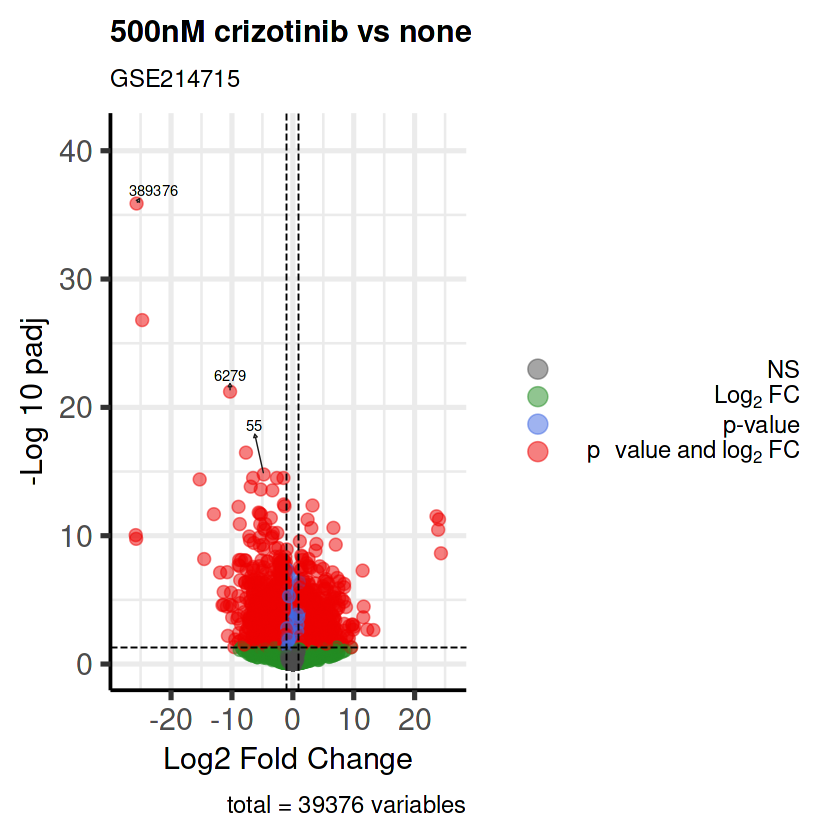

In [171]:
EnhancedVolcano(res_criz_214715,
  lab = rownames(res_criz_214715),
  x = "log2FoldChange",
  y = "padj",
  ylab = "-Log 10 padj",
  xlab = "Log2 Fold Change",
  title = "500nM crizotinib vs none",
  subtitle = "GSE214715",
  pCutoff = 0.05,
  FCcutoff = 1,
  pointSize = 3,
  labSize = 3,
  colAlpha = 0.5,
  legendPosition = "right",
  drawConnectors = TRUE,
  widthConnectors = 0.3
)

Warning message:
“ggrepel: 925 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


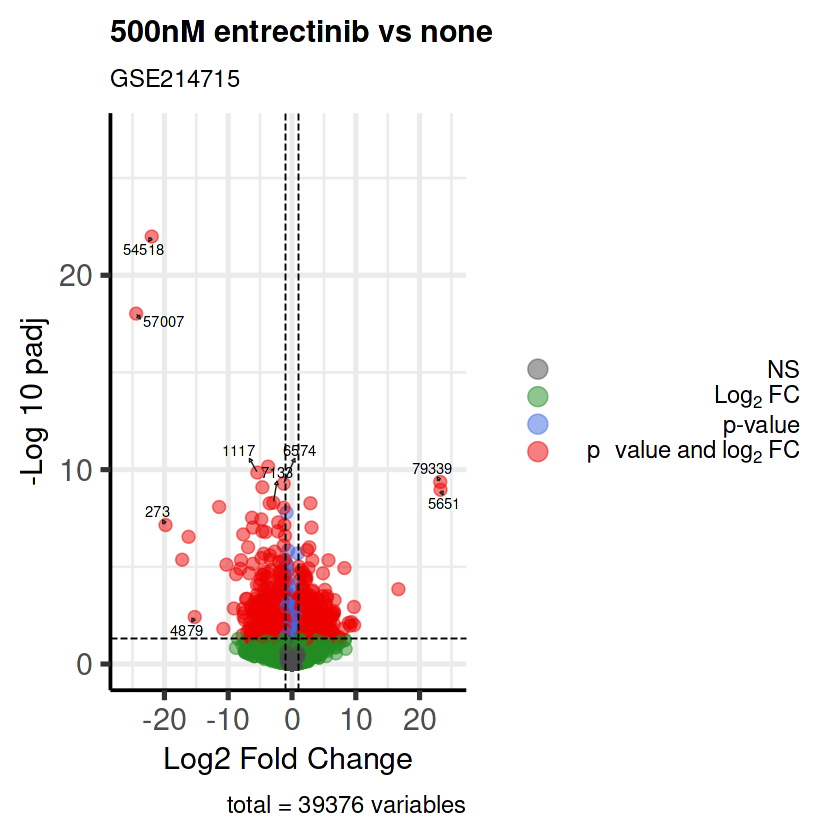

In [172]:
EnhancedVolcano(res_entr_214715,
  lab = rownames(res_entr_214715),
  x = "log2FoldChange",
  y = "padj",
  ylab = "-Log 10 padj",
  xlab = "Log2 Fold Change",
  title = "500nM entrectinib vs none",
  subtitle = "GSE214715",
  pCutoff = 0.05,
  FCcutoff = 1,
  pointSize = 3,
  labSize = 3,
  colAlpha = 0.5,
  legendPosition = "right",
  drawConnectors = TRUE,
  widthConnectors = 0.3
)

In [205]:
# Filter for padj < 0.05

res_criz_214715 <- as.data.frame(res_criz_214715)

sig_genes_criz_214715 <- res_criz_214715 %>%
  filter(!is.na(padj)) %>%  # Remove NA p-values
  filter(padj < 0.05)


In [206]:
head(sig_genes_criz_214715)
# <dbl> in R stands for double-precision floating-point numbers.

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8784,95.19906,-2.440678,0.6803587,-3.587340,3.340683e-04,5.396761e-03
6339,36.84168,1.315764,0.4474931,2.940301,3.278937e-03,2.954232e-02
102724312,29.88056,-2.228541,0.6059125,-3.677991,2.350784e-04,4.099059e-03
107985729,21.03980,-2.421367,0.5777447,-4.191068,2.776448e-05,7.895789e-04
64856,1415.58807,-3.501710,0.6222205,-5.627764,1.825611e-08,1.954780e-06
219293,65.51481,-2.324308,0.5045830,-4.606395,4.097107e-06,1.759171e-04


In [207]:
sorted_sig_genes_criz_214715 <- sig_genes_criz_214715[
  order(-abs(sig_genes_criz_214715$log2FoldChange), sig_genes_criz_214715$padj),
]

In [208]:
head(sorted_sig_genes_criz_214715, n = 10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5275,132.28504,-25.79769,3.491360,-7.389010,1.479263e-13,9.005753e-11
51297,154.44708,-25.73312,3.533946,-7.281696,3.296499e-13,1.756045e-10
389376,210.20293,-25.66192,1.915151,-13.399423,6.093485e-41,1.298400e-36
56649,144.97501,-24.74259,2.117060,-11.687241,1.481199e-31,1.578069e-27
107985349,56.11748,24.32427,3.534112,6.882710,5.872462e-12,2.360951e-09
5651,136.06201,23.99666,3.072904,7.809114,5.759133e-15,5.335461e-12
101927501,73.54748,23.86281,3.167992,7.532472,4.978871e-14,3.422251e-11
79339,108.11083,23.59095,2.990317,7.889115,3.043372e-15,3.088008e-12
3240,2617.81600,-15.29793,1.743734,-8.773086,1.738350e-18,4.115640e-15


In [209]:
dim(sorted_sig_genes_criz_214715)

[1] 2918    6

In [210]:
res_entr_214715 <- as.data.frame(res_entr_214715)

sig_genes_entr_214715 <- res_entr_214715 %>%
  filter(!is.na(padj)) %>%  # Remove NA p-values
  filter(padj < 0.05)

In [211]:
head(sig_genes_entr_214715)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
219293,65.51481,-2.290940,0.5293728,-4.327649,1.507095e-05,1.402747e-03
6518,20.88368,-3.894136,1.2804373,-3.041255,2.355945e-03,4.316635e-02
5226,1752.85347,-1.020011,0.2686680,-3.796550,1.467239e-04,7.000924e-03
4879,42.44190,-15.253732,3.8078353,-4.005880,6.178694e-05,3.805489e-03
7133,674.23763,-2.909643,0.4143530,-7.022136,2.185011e-12,5.039120e-09
11240,284.46508,5.176217,1.0445555,4.955426,7.217205e-07,1.528574e-04


In [212]:
sorted_sig_genes_entr_214715 <- sig_genes_entr_214715[
  order(-abs(sig_genes_entr_214715$log2FoldChange), sig_genes_entr_214715$padj),
]

In [213]:
head(sorted_sig_genes_entr_214715, n = 10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57007,172.66304,-24.43285,2.487601,-9.821851,9.066303e-23,9.409010e-19
5651,136.06201,23.28753,3.212278,7.249537,4.181978e-13,1.085014e-09
79339,108.11083,23.24198,3.125305,7.436709,1.032249e-13,4.285071e-10
54518,84.35507,-21.99548,2.042805,-10.767292,4.912373e-27,1.019612e-22
273,122.96445,-19.82752,3.035192,-6.532542,6.466282e-11,7.115064e-08
6387,223.69160,-17.22407,2.989070,-5.762353,8.294935e-09,4.304242e-06
101927501,73.54748,16.68144,3.354827,4.972369,6.613953e-07,1.415250e-04
5673,380.91508,-16.21769,2.588323,-6.265713,3.711231e-10,2.852975e-07
4879,42.44190,-15.25373,3.807835,-4.005880,6.178694e-05,3.805489e-03


In [214]:
dim(sig_genes_entr_214715)

[1] 1203    6

In [215]:
# Extract GeneIDs (column names) and map to gene symbols
gene_ids <- rownames(sorted_sig_genes_entr_214715)

gene_symbols <- mapIds(
  org.Hs.eg.db,          # Annotation package
  keys = gene_ids,       # Input IDs (e.g., ENTREZID)
  column = "SYMBOL",     # Output type
  keytype = "ENTREZID",  # Input ID type
  multiVals = "first"    # Handling multiple mappings
)


# Replace column names with gene symbols (if available)
# If mapping fails, fall back to original ID
new_names <- ifelse(is.na(gene_symbols), gene_ids, gene_symbols)
rownames(sorted_sig_genes_entr_214715) <- new_names



'select()' returned 1:1 mapping between keys and columns



In [216]:
head(sorted_sig_genes_entr_214715)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACKR3,172.66304,-24.43285,2.487601,-9.821851,9.066303e-23,9.409010e-19
TMPRSS15,136.06201,23.28753,3.212278,7.249537,4.181978e-13,1.085014e-09
OR51B4,108.11083,23.24198,3.125305,7.436709,1.032249e-13,4.285071e-10
APBB1IP,84.35507,-21.99548,2.042805,-10.767292,4.912373e-27,1.019612e-22
AMPH,122.96445,-19.82752,3.035192,-6.532542,6.466282e-11,7.115064e-08
CXCL12,223.69160,-17.22407,2.989070,-5.762353,8.294935e-09,4.304242e-06


In [217]:
write.csv(sorted_sig_genes_entr_214715, "sig_genes_entr_214715.csv")


In [218]:
# Extract GeneIDs (column names) and map to gene symbols
gene_ids <- rownames(sorted_sig_genes_criz_214715)

gene_symbols <- mapIds(
  org.Hs.eg.db,          # Annotation package
  keys = gene_ids,       # Input IDs (e.g., ENTREZID)
  column = "SYMBOL",     # Output type
  keytype = "ENTREZID",  # Input ID type
  multiVals = "first"    # Handling multiple mappings
)


# Replace column names with gene symbols (if available)
# If mapping fails, fall back to original ID
new_names <- ifelse(is.na(gene_symbols), gene_ids, gene_symbols)
rownames(sorted_sig_genes_criz_214715) <- new_names


'select()' returned 1:1 mapping between keys and columns



In [219]:
head(sorted_sig_genes_criz_214715)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SERPINB13,132.28504,-25.79769,3.491360,-7.389010,1.479263e-13,9.005753e-11
BPIFA1,154.44708,-25.73312,3.533946,-7.281696,3.296499e-13,1.756045e-10
SFTA2,210.20293,-25.66192,1.915151,-13.399423,6.093485e-41,1.298400e-36
TMPRSS4,144.97501,-24.74259,2.117060,-11.687241,1.481199e-31,1.578069e-27
LOC107985349,56.11748,24.32427,3.534112,6.882710,5.872462e-12,2.360951e-09
TMPRSS15,136.06201,23.99666,3.072904,7.809114,5.759133e-15,5.335461e-12


In [220]:
write.csv(sorted_sig_genes_criz_214715, "sig_genes_criz_214715.csv")

## 239844
We are going to find the significant difference in expression for this study, using all the control and treatment cell lines.

In [189]:
dds_239844 <- DESeqDataSetFromMatrix(
  countData = count_clean_matrix_239844,
  colData = metadata_clean_gse239844,
  design = ~ treatment # treatment MUST be in colData
)

# Run analysis
dds_239844 <- DESeq(dds_239844)

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning 

In [190]:
# Extract Results
res_239844 <- results(dds_239844)

# Summarize Results
summary(res_239844)


out of 33518 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2008, 6%
LFC < 0 (down)     : 1966, 5.9%
outliers [1]       : 0, 0%
low counts [2]     : 10952, 33%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [191]:
resultsNames(dds_239844)

[1] "Intercept"                           "treatment_250.nM.crizotinib_vs_DMSO"

In [192]:
# For "500nM.crizotinib vs none"
res_criz_239844 <- results(
                           dds_239844,
                           name = "treatment_250.nM.crizotinib_vs_DMSO")

In [221]:
# Filter for padj < 0.05

res_criz_239844 <- as.data.frame(res_criz_239844)

sig_res_criz_239844 <- res_criz_239844 %>%
  filter(!is.na(padj)) %>%  # Remove NA p-values
  filter(padj < 0.05)


In [222]:
head(sig_res_criz_239844)
# BaseMean: average normalized count value for this gene across all samples.
# It indicates the gene's overall expression level
# log2FoldChange: This represents the effect size
# or how much expression changed with treatment.
# A value of 1.17 means MMP23A is approximately 2.26
# times more highly expressed in your treatment.
# IfcSE: standard error of the log2 fold change estimate.
# stat: Wald statistic for the hypothesis test.
# Higher values indicate stronger evidence against the null hypothesis.
# padj: adjusted p-value for multiple testing.
# It indicates the significance of the result
# after correcting for multiple comparisons.

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26155,4069.14636,-0.5332653,0.13582115,-3.926231,8.628715e-05,2.335340e-03
101928895,28.81482,0.5259797,0.16894074,3.113398,1.849466e-03,2.138678e-02
6339,54.80533,0.6028277,0.16165958,3.728995,1.922451e-04,4.250104e-03
102465435,10.94013,-0.6222313,0.21290746,-2.922543,3.471853e-03,3.297055e-02
54998,2207.32075,-0.2957849,0.09617719,-3.075416,2.102093e-03,2.326400e-02
83858,1151.58899,-0.7968708,0.15725282,-5.067450,4.031813e-07,4.193829e-05


In [223]:
sorted_sig_res_criz_239844 <- sig_res_criz_239844[
  order(-abs(sig_res_criz_239844$log2FoldChange), sig_res_criz_239844$padj),
]


In [224]:
head(sorted_sig_res_criz_239844, n = 10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
105375767,14.040343,5.432973,1.4902170,3.645760,2.666029e-04,5.387432e-03
389384,8.180690,4.564176,0.8554738,5.335261,9.540732e-08,1.381152e-05
219995,21.773429,4.514836,0.7605770,5.936067,2.919413e-09,9.422123e-07
4606,16.797894,-4.251996,0.8602991,-4.942463,7.714192e-07,6.788312e-05
100288797,2.572230,-4.231906,1.1382012,-3.718064,2.007551e-04,4.378206e-03
731424,3.137399,-4.083749,1.1532103,-3.541201,3.983101e-04,7.221410e-03
105369358,2.719362,4.003610,1.4304319,2.798882,5.127991e-03,4.280659e-02
84647,3.830704,3.827895,1.0203831,3.751429,1.758292e-04,3.980759e-03
9965,2.253126,-3.732248,1.2570439,-2.969068,2.987049e-03,2.972825e-02


In [225]:
dim(sig_res_criz_239844)

[1] 2898    6

Warning message:
“ggrepel: 697 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


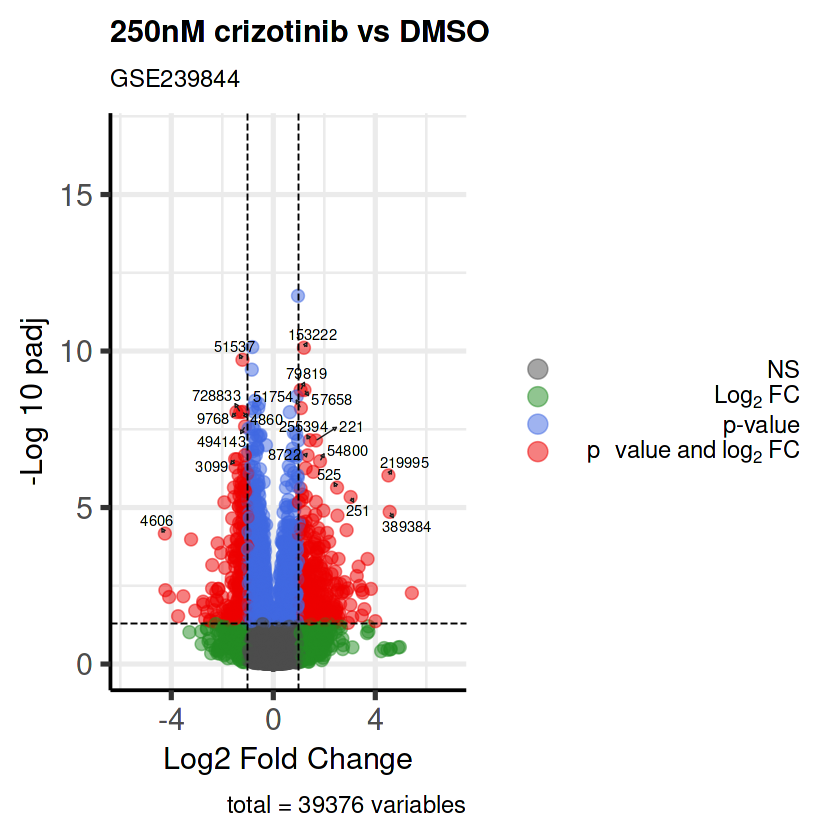

In [ ]:
EnhancedVolcano(res_criz_239844,
  lab = rownames(res_criz_239844),
  x = "log2FoldChange",
  y = "padj",
  ylab = "-Log 10 padj",
  xlab = "Log2 Fold Change",
  title = "250nM crizotinib vs DMSO",
  subtitle = "GSE239844",
  pCutoff = 0.05,
  FCcutoff = 1,
  pointSize = 3,
  labSize = 3,
  colAlpha = 0.5,
  legendPosition = "right",
  drawConnectors = TRUE,
  widthConnectors = 0.3
)
# NS in EnhancedVolcano stands for Non-Significant, meaning genes didn't meet BOTH of the thresholds for fold change and statistical significance.

In [227]:
# Extract GeneIDs (column names) and map to gene symbols
gene_ids <- rownames(sorted_sig_res_criz_239844)

gene_symbols <- mapIds(
  org.Hs.eg.db,          # Annotation package
  keys = gene_ids,       # Input IDs (e.g., ENTREZID)
  column = "SYMBOL",     # Output type
  keytype = "ENTREZID",  # Input ID type
  multiVals = "first"    # Handling multiple mappings
)


# Replace column names with gene symbols (if available)
# If mapping fails, fall back to original ID
new_names <- ifelse(is.na(gene_symbols), gene_ids, gene_symbols)
rownames(sorted_sig_res_criz_239844) <- new_names


'select()' returned 1:1 mapping between keys and columns



In [228]:
head(sorted_sig_res_criz_239844)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC105375767,14.040343,5.432973,1.4902170,3.645760,2.666029e-04,5.387432e-03
BNIP5,8.180690,4.564176,0.8554738,5.335261,9.540732e-08,1.381152e-05
MS4A15,21.773429,4.514836,0.7605770,5.936067,2.919413e-09,9.422123e-07
MYBPC2,16.797894,-4.251996,0.8602991,-4.942463,7.714192e-07,6.788312e-05
TMEM239,2.572230,-4.231906,1.1382012,-3.718064,2.007551e-04,4.378206e-03
MIR3945HG,3.137399,-4.083749,1.1532103,-3.541201,3.983101e-04,7.221410e-03


In [229]:
write.csv(sorted_sig_res_criz_239844, "sig_genes_entr_239844.csv")

# Difference in expression between pairs of samples

In [ ]:
# Function to run DESeq2 analysis for a given cell line and treatment
run_deseq_analysis <- function(cell_lines,
                               treatment_name_ref,
                               treatment_name,
                               study_code,
                               output = FALSE,
                               design = ~ treatment) {
  # Construct object names based on study code
  meta_name <- paste0("metadata_clean_gse", study_code)
  count_name <- paste0("count_clean_matrix_", study_code)

  # Filter metadata
  meta_filtered <- get(meta_name) %>%
    filter(`cell line:ch1` %in% cell_lines &
             (`treatment:ch1` == treatment_name |
                `treatment:ch1` == treatment_name_ref))

  # Subset count matrix
  count_subset <- get(count_name)[, meta_filtered$geo_accession]

  # Create DESeqDataSet
  deseq_data <- DESeqDataSetFromMatrix(
    countData = count_subset,
    colData = meta_filtered,
    design = design
  )

  # Run analysis
  deseq_data <- DESeq(deseq_data)

  # Process results
  res <- results(deseq_data)
  summary(res)
  res <- as.data.frame(res)
  res <- res %>%
    filter(!is.na(padj)) %>%  # Remove NA p-values
    filter(padj < 0.05)

  # Sort results
  res <- res[order(-abs(res$log2FoldChange), res$padj), ]

  # Extract GeneIDs (column names) and map to gene symbols
  gene_ids <- rownames(res)

  gene_symbols <- mapIds(
    org.Hs.eg.db,          # Annotation package
    keys = gene_ids,       # Input IDs (e.g., ENTREZID)
    column = "SYMBOL",     # Output type
    keytype = "ENTREZID",  # Input ID type
    multiVals = "first"    # Handling multiple mappings
  )

  # Replace column names with gene symbols (if available)
  # If mapping fails, fall back to original ID
  new_names <- ifelse(is.na(gene_symbols), gene_ids, gene_symbols)
  
  # Create a new dataframe with gene column as the first column
  res_with_gene <- res
  res_with_gene$gene <- new_names  # Add gene column
  
  # Reorder columns to put gene first
  res_with_gene <- res_with_gene %>%
    dplyr::select(gene, everything())
  
  # For the returned dataframe, keep the rownames as is
  rownames(res) <- new_names

  if (output) {
    # For the CSV output, write with gene as a named column
    write.csv(res_with_gene,
              paste0(
                     treatment_name_ref,
                     treatment_name,
                     toString(cell_lines),
                     ".csv"),
                     row.names = FALSE)  # Don't include row names since we have a gene column
  }

  # Return the original dataframe with rownames for use in R
  return(res)
}


# Intra-Study Comparisons

In [85]:
comparisons <- list(
  # Cuto-28 TPM3 500 nM crizotinib vs control
  list(cell_lines = "CUTO28 (TPM3-ROS1)",
       treatment_name = "500nM crizotinib",
       treatment_name_ref = "none",
       design = ~ treatment,
       study_code = "214715"),
  # Cuto-28 TPM3 500 nM entrectinib vs control
  list(cell_lines = "CUTO28 (TPM3-ROS1)",
       treatment_name = "500nM entrectinib",
       treatment_name_ref = "none",
       design = ~ treatment,
       study_code = "214715"),
  # Cuto-37 CD74 500 nM crizotinib vs control
  list(cell_lines = "CUTO37 (CD74-ROS1)",
       treatment_name = "500nM crizotinib",
       treatment_name_ref = "none",
       design = ~ treatment,
       study_code = "214715"),
  # Cuto-37 CD74 500 nM entrectinib vs control
  list(cell_lines = "CUTO37 (CD74-ROS1)",
       treatment_name = "500nM entrectinib",
       treatment_name_ref = "none",
       design = ~ treatment,
       study_code = "214715"),
  # Cuto-28 TPM3 500 nM crizotinib vs Cuto-37 CD74 500 nM crizotinib
  list(cell_lines = c("CUTO28 (TPM3-ROS1)", "CUTO37 (CD74-ROS1)"),
       treatment_name = "500nM crizotinib",
       treatment_name_ref = "500nM crizotinib",
       design = ~ cell_line,
       study_code = "214715"),
  # Cuto-28 TPM3 500 nM entrectinib vs Cuto-37 CD74 500 nM entrectinib
  list(cell_lines = c("CUTO28 (TPM3-ROS1)", "CUTO37 (CD74-ROS1)"),
       treatment_name = "500nM entrectinib",
       treatment_name_ref = "500nM entrectinib",
       design = ~ cell_line,
       study_code = "214715"),

#   Cuto-23 CD74 250nM crizotinib vs others
  list(cell_lines = c("CUTO23", "CUTO27"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),

  list(cell_lines = c("CUTO23", "CUTO28"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),

  list(cell_lines = c("CUTO23", "CUTO33"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),
  list(cell_lines = c("CUTO23", "CUTO37"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),
  list(cell_lines = c("CUTO23", "CUTO38"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),

  # Cuto-27 CD74 250nM crizotinib vs others
  list(cell_lines = c("CUTO27", "CUTO28"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),

  list(cell_lines = c("CUTO27", "CUTO33"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),
  list(cell_lines = c("CUTO27", "CUTO37"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),
  list(cell_lines = c("CUTO27", "CUTO38"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),

  # Cuto-28 TPM3 250nM crizotinib vs others
  list(cell_lines = c("CUTO28", "CUTO33"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),
  list(cell_lines = c("CUTO28", "CUTO37"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),
  list(cell_lines = c("CUTO28", "CUTO38"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),

  # Cuto-33 CD74 250nM crizotinib vs others
  list(cell_lines = c("CUTO33", "CUTO37"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),
  list(cell_lines = c("CUTO33", "CUTO38"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),
  # Cuto-37 CD74 250nM crizotinib vs others
  list(cell_lines = c("CUTO37", "CUTO38"),
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "250 nM crizotinib",
       design = ~ cell_line,
       study_code = "239844"),

  # Ctrl Vs 250nM crizotinib for each sample
  list(cell_lines = "CUTO23",
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "DMSO",
       study_code = "239844",
       design = ~ treatment),

  list(cell_lines = "CUTO27",
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "DMSO",
       study_code = "239844",
       design = ~ treatment),

  list(cell_lines = "CUTO28",
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "DMSO",
       study_code = "239844",
       design = ~ treatment),

  list(cell_lines = "CUTO33",
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "DMSO",
       study_code = "239844",
       design = ~ treatment),

  list(cell_lines = "CUTO37",
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "DMSO",
       study_code = "239844",
       design = ~ treatment),

  list(cell_lines = "CUTO38",
       treatment_name = "250 nM crizotinib",
       treatment_name_ref = "DMSO",
       study_code = "239844",
       design = ~ treatment)

)


In [ ]:
results_list <- list()
for (i in seq_along(comparisons)) {
  comp <- comparisons[[i]]
  message("Running comparison ", i, ": ", paste(comp$cell_lines, collapse = ", "), " | ", comp$treatment_name_ref, " vs ", comp$treatment_name)
  results_list[[i]] <- run_deseq_analysis(
    cell_lines = comp$cell_lines,
    treatment_name_ref = comp$treatment_name_ref,
    treatment_name = comp$treatment_name,
    study_code = comp$study_code,
    output = TRUE,
    design = comp$design
  )
}


# Inter-Study Comparison
We are going to compare the effect of different treatments, on the same cell line. To do This, we're going to use both studies, each containing a specific treatment.


In [ ]:
# Filter metadata
meta_filtered_500criz <- metadata_clean_gse214715 %>%
  filter(`cell line:ch1` %in% c("CUTO28 (TPM3-ROS1)", "CUTO37 (CD74-ROS1)") &
           `treatment:ch1` == "500nM crizotinib")


# Subset count matrix
count_subset_500criz <- count_clean_matrix_214715[, meta_filtered_500criz$geo_accession]

In [ ]:
meta_filtered_250criz <- metadata_clean_gse239844 %>%
  filter(`cell line:ch1` %in% c("CUTO28", "CUTO37") &
           (`treatment:ch1` == "250 nM crizotinib"))

# Subset count matrix
count_subset_250criz <- count_clean_matrix_239844[, meta_filtered_250criz$geo_accession]


In [90]:
metadata_clean_gse2425 <- rbind(meta_filtered_250criz, meta_filtered_500criz)
count_clean_matrix_2425 <- cbind(count_subset_250criz, count_subset_500criz)

In [91]:
comparisons <- list(
                    list(cell_lines = c("CUTO28", "CUTO28 (TPM3-ROS1)"),
                         treatment_name = "500nM crizotinib",
                         treatment_name_ref = "250 nM crizotinib",
                         design = ~ treatment,
                         study_code = "2425"),

                    list(cell_lines = c("CUTO37", "CUTO37 (CD74-ROS1)"),
                         treatment_name = "500nM crizotinib",
                         treatment_name_ref = "250 nM crizotinib",
                         design = ~ treatment,
                         study_code = "2425")
)

In [ ]:
results_list <- list()
for (i in seq_along(comparisons)) {
  comp <- comparisons[[i]]
  message("Running comparison ", i, ": ", paste(comp$cell_lines, collapse = ", "), " | ", comp$treatment_name_ref, " vs ", comp$treatment_name)
  results_list[[i]] <- run_deseq_analysis(
    cell_lines = comp$cell_lines,
    treatment_name_ref = comp$treatment_name_ref,
    treatment_name = comp$treatment_name,
    study_code = comp$study_code,
    output = TRUE,
    design = comp$design
  )
}

# Gene Name Mapping

In [52]:
library(org.Hs.eg.db)
library(AnnotationDbi)
library(dplyr)

map_gene_ids_to_symbols <- function(count_df, output_file = NULL, id_type = "ENTREZID") {
    # Check if the GeneID column exists
    if (!"GeneID" %in% colnames(count_df)) {
        stop("The 'GeneID' column is not found in the data frame.")
    }
    # Ensure GeneID is character, not numeric or factor
    gene_ids <- as.character(count_df$GeneID)
    
    # Map to gene symbols
    gene_symbols <- mapIds(
        org.Hs.eg.db,
        keys = gene_ids,
        column = "SYMBOL",
        keytype = id_type,
        multiVals = "first"
    )
    gene_symbols <- unlist(gene_symbols)
    new_names <- ifelse(is.na(gene_symbols), gene_ids, gene_symbols)
    
    # Add gene column and remove GeneID column
    count_df <- count_df %>%
        mutate(gene = new_names) %>%
        dplyr::select(-GeneID) %>%
        as.data.frame()
    
    # Ensure gene names are unique before setting as row names
    count_df$gene <- make.unique(count_df$gene)
    rownames(count_df) <- count_df$gene
    count_df$gene <- NULL
    
    # Optionally write to CSV
    if (!is.null(output_file)) {
        write.csv(count_df, file = output_file)
    }
    
    return(count_df)
}


In [53]:
# Map and save
modified_counts_214715 <- map_gene_ids_to_symbols(
    raw_counts_gse214715,
    output_file = "raw_count_gse214715.csv"
)
modified_counts_239844 <- map_gene_ids_to_symbols(
    raw_counts_gse239844,
    output_file = "raw_count_gse239844.csv"
)

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [54]:
modified_counts_214715

,GSM6614824,GSM6614825,GSM6614826,GSM6614827,GSM6614828,GSM6614829,GSM6614830,GSM6614831,GSM6614832,GSM6614833,GSM6614834,GSM6614835,GSM6614836,GSM6614837,GSM6614838,GSM6614839,GSM6614840
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
DDX11L1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
WASH7P,189,136,175,234,314,210,497,293,321,243,237,166,168,218,180,249,128
MIR6859-1,4,1,2,3,8,2,23,10,15,8,10,1,2,1,2,2,2
MIR1302-2HG,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LOC100996442,20,4,14,30,32,16,44,20,33,34,26,7,12,10,6,9,9
LOC729737,736,298,487,494,332,361,1218,579,788,425,278,56,96,67,28,77,65
